# Визуализация TRT postscript сечений

In [1]:
import sys

sys.version, sys.prefix

('3.13.9 (main, Oct 14 2025, 21:29:44) [Clang 20.1.4 ]',
 '/home/dvp/dev/mckit-meshes/.venv')

In [2]:
from pathlib import Path

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from mckit_meshes.plot import load_plotm_file, Page, plot_ps_page

In [6]:
TRT_ROOT = Path("~/dev/mcnp/trt").expanduser()
assert TRT_ROOT.is_dir()

In [7]:
PROTOTYPE_DIR = TRT_ROOT / "mcnp-5/prototype"
assert PROTOTYPE_DIR.is_dir()

In [8]:
PLOTM_DIR = PROTOTYPE_DIR / "plotm"
assert PLOTM_DIR.is_dir()

In [9]:
ps_files = list(PLOTM_DIR.glob("*.ps"))
assert ps_files
ps_files

[PosixPath('/home/dvp/dev/mcnp/trt/mcnp-5/prototype/plotm/pz=50.ps'),
 PosixPath('/home/dvp/dev/mcnp/trt/mcnp-5/prototype/plotm/ports-vertical-cut.ps'),
 PosixPath('/home/dvp/dev/mcnp/trt/mcnp-5/prototype/plotm/pz=0-rotated.ps'),
 PosixPath('/home/dvp/dev/mcnp/trt/mcnp-5/prototype/plotm/py=0-tc-vertical-cut.ps')]

In [10]:
pages = { p.stem: load_plotm_file(p)[0] for p in ps_files }
len(pages)

4

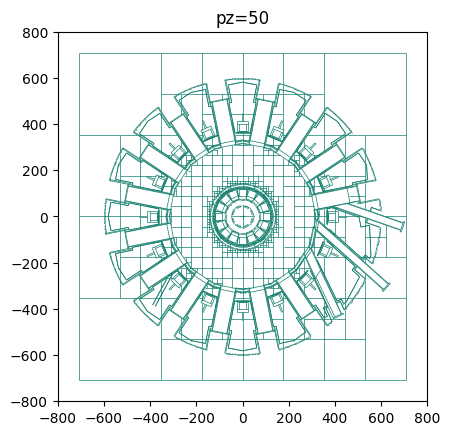

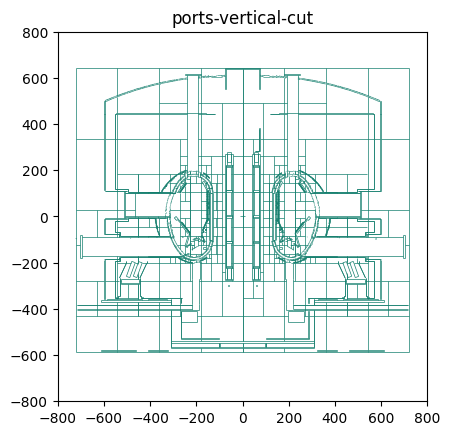

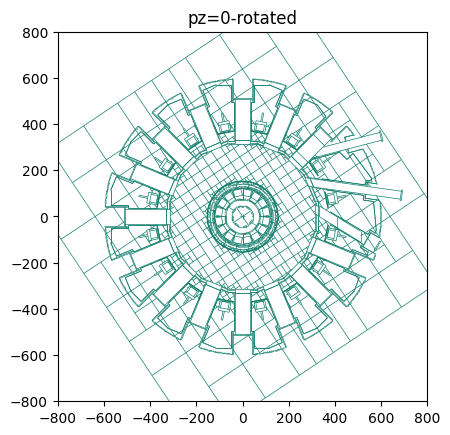

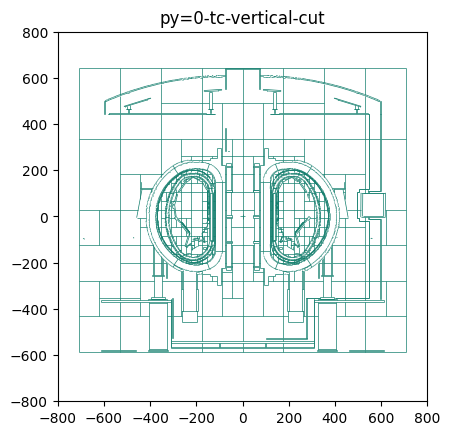

In [11]:
for i, (stem, p) in enumerate(pages.items()):
    fig, axes = plt.subplots()
    axes.set_aspect("equal")
    axes.set_xlim(-p.extent[0], p.extent[0])
    axes.set_ylim(-p.extent[1], p.extent[1])
    axes.set_title(stem)
    plot_ps_page(axes, p)
    plt.savefig((PLOTM_DIR / stem).with_suffix(".png"), dpi=1200)
    plt.show()